### Part 1 - Data Preparation

In [1]:
# Import necessary libraries
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Load Dataset

In [2]:
# Step 2: Load SVHN dataset
def load_svhn_data():
    data = loadmat('train_32x32.mat')
    X = np.transpose(data['X'], (3, 0, 1, 2))
    y = data['y'].flatten()
    print(y)
    y[y == 10] = 0  # Replace label 10 with 0
    return X, y

# Load the dataset
X, y = load_svhn_data()

[1 9 2 ... 1 6 9]


In [3]:
print(X.shape)
print(y.shape)

(73257, 32, 32, 3)
(73257,)


### 2. Split Dataset into Training, Validation (20%) and Testing Sets (10%)

In [4]:
# Step 3: Split the training dataset into validation (20%) and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [5]:
#Save the datasets to a file
np.savez('svhn_datasets.npz',
         X_train=X_train, y_train=y_train,
         X_val=X_val, y_val=y_val,
         X_test=X_test, y_test=y_test)

### 3. Visualize the distribution of class labels in the training, validation, and test sets

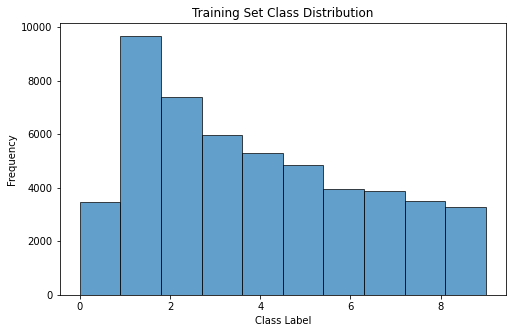

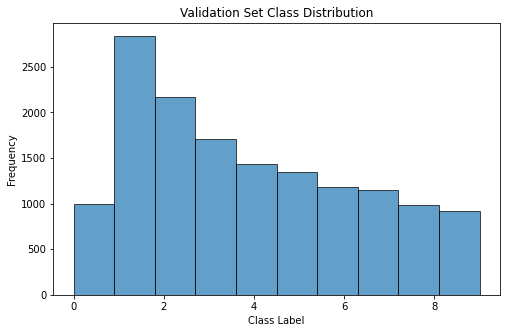

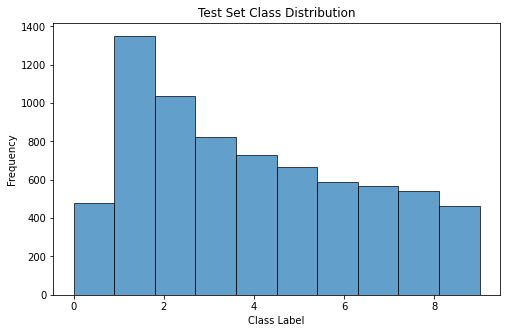

In [6]:
# Step 4: Visualize the distribution of class labels in the training, validation, and test sets
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 5))
    plt.hist(y, bins=10, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('Class Label')
    plt.ylabel('Frequency')
    plt.show()

plot_class_distribution(y_train, 'Training Set Class Distribution')
plot_class_distribution(y_val, 'Validation Set Class Distribution')
plot_class_distribution(y_test, 'Test Set Class Distribution')

### 4. Visualize 5 unique samples from the training data

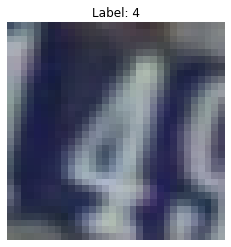

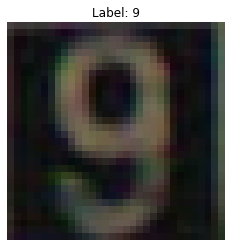

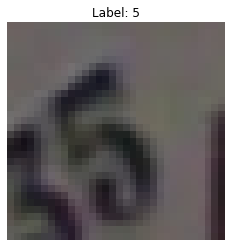

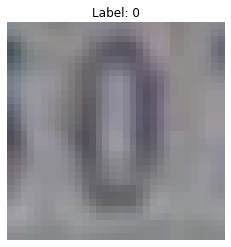

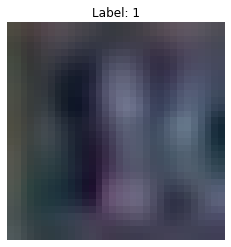

In [10]:
# Step 5: Visualize 5 unique samples from the training data
def visualize_samples(X, y, num_samples=5):
    total_samples = X.shape[0]
    unique_indices = np.random.choice(total_samples, num_samples, replace=False)

    for i, index in enumerate(unique_indices):
        plt.figure(figsize=(4, 4))
        plt.imshow(X[index])
        plt.title(f'Label: {y[index]}')
        plt.axis('off')
        plt.show()

visualize_samples(X_train, y_train)